In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
path = "/Users/sethfried/Fantasy Football/Cleaned Data/Cleaned_team_Logs/"
team_names = ["atl","buf","car","chi","cin","cle","clt","crd","dal","den","det","gnb","htx","jax","kan","mia","min","nor","nwe","nyg","nyj","oti","phi","pit","rai","ram","rav","sdg","sea","sfo","tam","was"]
teams = {}

for team in team_names:
    df = pd.DataFrame()
    df = pd.read_csv(f"{path}{team}_2006_2024_gamelog.csv")
    df.dropna()
    df = df.drop(['Unnamed: 47_level_0 ToP','Turnovers FL', 'Turnovers Int','Penalties Yds','First Downs Pass', 'First Downs Rsh',
       'First Downs Pen', 'First Downs 1stD', 'Downs 3DConv', 'Downs 3DAtt',
       'Downs 4DConv', 'Downs 4DAtt','Kicking FGA', 'Kicking FGM', 'Kicking XPA', 'Kicking XPM',
       'Punting Pnt', 'Punting Yds','Date','Home','OT','Opp','Day','Week'], axis=1)
    teams[team] = df

print(teams["atl"].head())


   Year Score Rslt  Team Pts  Passing Cmp  Passing Att  Passing Cmp%  \
0  2006          W        20           10           22          45.5   
1  2006          W        14           10           16          62.5   
2  2006          L         3           12           31          38.7   
3  2006          W        32           13           22          59.1   
4  2006          L        14           14           27          51.9   

   Passing Yds  Passing TD  Passing Y/A  Passing AY/A  ...  Rushing Yds  \
0        133.0           2          6.0          7.86  ...        252.0   
1         76.0           1          4.8          3.19  ...        306.0   
2        112.0           0          3.6          3.61  ...        117.0   
3        143.0           0          6.5          4.45  ...        262.0   
4        106.0           0          3.9          2.26  ...        223.0   

   Rushing TD  Rushing Y/A  Total Offense Ply  Total Offense Tot  \
0           0          5.4                 70   

In [75]:
print(teams["atl"].columns)

Index(['Year', 'Score Rslt', 'Team Pts', 'Passing Cmp', 'Passing Att',
       'Passing Cmp%', 'Passing Yds', 'Passing TD', 'Passing Y/A',
       'Passing AY/A', 'Passing Rate', 'Passing Sk', 'Rushing Att',
       'Rushing Yds', 'Rushing TD', 'Rushing Y/A', 'Total Offense Ply',
       'Total Offense Tot', 'Total Offense Y/P', 'Penalties Pen',
       'Turnovers TO', 'Opp Pts', 'Team'],
      dtype='object')


In [76]:
aggregation_dict = {
    'Passing Cmp': 'sum',
    'Passing Att': 'sum',
    'Passing Yds': 'sum',
    'Passing TD': 'sum',
    'Rushing Yds': 'sum',
    'Rushing TD': 'sum',
    'Team Pts': 'sum',
    'Passing Cmp%': 'mean',
    'Passing Y/A': 'mean',
    'Passing AY/A': 'mean',
    'Passing Rate': 'mean',
    'Passing Sk': 'sum',
    'Rushing Att': 'sum',
    'Rushing Y/A': 'mean',
    'Total Offense Ply': 'sum',
    'Total Offense Tot': 'sum',
    'Total Offense Y/P': 'mean',
    'Penalties Pen': 'sum',
    'Turnovers TO': 'sum',
    'Opp Pts': 'sum',
    'Wins':'sum'
}

teams1 = teams.copy()

for team_name in teams1:
    team_df = teams1[team_name]
    team_df['Wins'] = team_df['Score Rslt'].apply(lambda x: 1 if x == 'W' else 0)
    teams1[team_name] = team_df.groupby('Year').agg(aggregation_dict)

print(teams1["atl"].head())


      Passing Cmp  Passing Att  Passing Yds  Passing TD  Rushing Yds  \
Year                                                                   
2006          222          416       2371.0          21       2939.0   
2007          336          555       3293.0          18       1520.0   
2008          265          434       3336.0          16       2443.0   
2009          332          570       3571.0          26       1876.0   
2010          361          577       3567.0          28       1891.0   

      Rushing TD  Team Pts  Passing Cmp%  Passing Y/A  Passing AY/A  ...  \
Year                                                                 ...   
2006           9       292      53.57500      5.68750      5.125625  ...   
2007           7       259      59.60000      5.90625      5.184375  ...   
2008          23       391      62.35625      8.15000      7.897500  ...   
2009          15       363      59.21250      6.35000      5.941250  ...   
2010          14       414      62.7812

In [77]:
all_teams_dfs = []

for team_name, df in teams.items():
    df['Team'] = team_name
    all_teams_dfs.append(df)

congregated_stats = pd.concat(all_teams_dfs, ignore_index=True)

aggregation_dict = {
    'Passing Cmp': 'sum',
    'Passing Att': 'sum',
    'Passing Yds': 'sum',
    'Passing TD': 'sum',
    'Rushing Yds': 'sum',
    'Rushing TD': 'sum',
    'Team Pts': 'sum',
    'Passing Cmp%': 'mean',
    'Passing Y/A': 'mean',
    'Passing AY/A': 'mean',
    'Passing Rate': 'mean',
    'Passing Sk': 'sum',
    'Rushing Att': 'sum',
    'Rushing Y/A': 'mean',
    'Total Offense Ply': 'sum',
    'Total Offense Tot': 'sum',
    'Total Offense Y/P': 'mean',
    'Penalties Pen': 'sum',
    'Turnovers TO': 'sum',
    'Opp Pts': 'sum'
}

congregated_stats['Wins'] = congregated_stats['Score Rslt'].apply(lambda x: 1 if x == 'W' else 0)
aggregation_dict['Wins'] = 'sum'

congregated_stats = congregated_stats.groupby('Team').agg(aggregation_dict)

congregated_stats['Total Cmp%'] = (congregated_stats['Passing Cmp'] / congregated_stats['Passing Att']) * 100
congregated_stats = congregated_stats.reset_index()
congregated_stats.rename(columns={'index': 'Team'}, inplace=True)
print(congregated_stats.head())

  Team  Passing Cmp  Passing Att  Passing Yds  Passing TD  Rushing Yds  \
0  atl         6913        10746      74463.0         471      35039.0   
1  buf         6059         9856      64044.0         433      38431.0   
2  car         5929         9934      62200.0         369      38378.0   
3  chi         6172        10046      62833.0         414      34868.0   
4  cin         6727        10592      69938.0         493      31886.0   

   Rushing TD  Team Pts  Passing Cmp%  Passing Y/A  ...  Rushing Att  \
0         255      7085     64.247727     7.003247  ...         8316   
1         283      6905     61.442345     6.576547  ...         8639   
2         304      6456     59.900974     6.334416  ...         8665   
3         228      6547     61.251948     6.276948  ...         8355   
4         230      6822     63.438436     6.642997  ...         8105   

   Rushing Y/A  Total Offense Ply  Total Offense Tot  Total Offense Y/P  \
0     4.143831              19727           109

In [89]:
print(congregated_stats.columns)

Index(['Team', 'Passing Cmp', 'Passing Att', 'Passing Yds', 'Passing TD',
       'Rushing Yds', 'Rushing TD', 'Team Pts', 'Passing Cmp%', 'Passing Y/A',
       'Passing AY/A', 'Passing Rate', 'Passing Sk', 'Rushing Att',
       'Rushing Y/A', 'Total Offense Ply', 'Total Offense Tot',
       'Total Offense Y/P', 'Penalties Pen', 'Turnovers TO', 'Opp Pts', 'Wins',
       'Total Cmp%'],
      dtype='object')


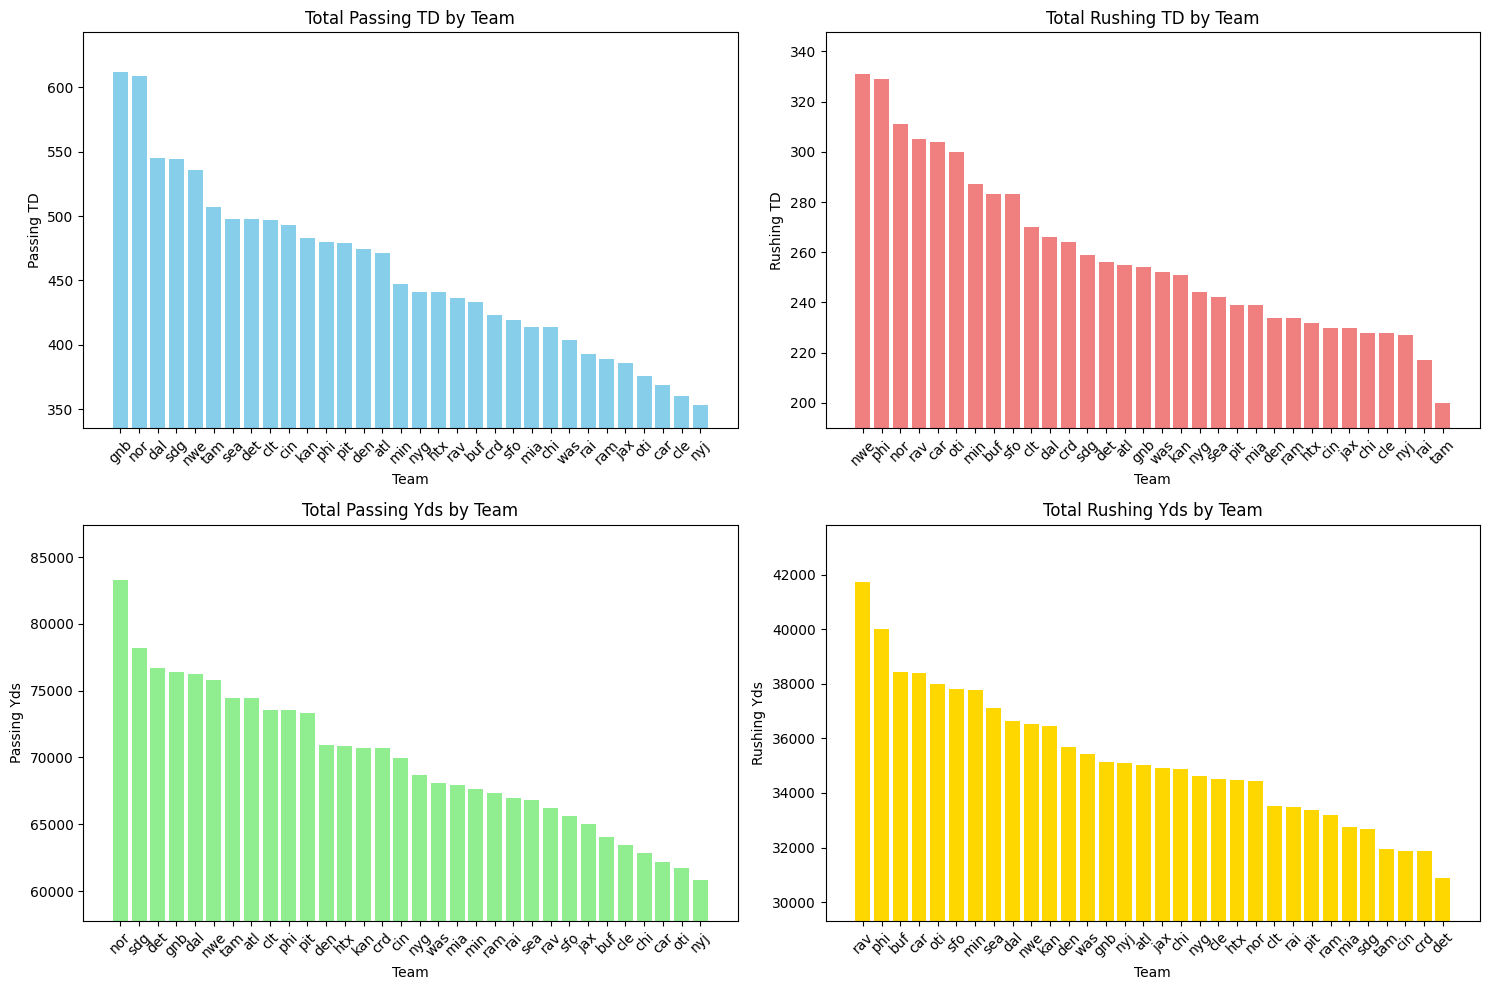

In [ ]:

stats_to_plot = ['Passing TD', 'Rushing TD', 'Passing Yds', 'Rushing Yds']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()
for i, stat in enumerate(stats_to_plot):
    df_sorted = congregated_stats.sort_values(by=stat, ascending=False)
    ax = axes[i]
    ax.bar(df_sorted['Team'], df_sorted[stat], color=colors[i])
    ax.set_title(f'Total {stat} by Team', fontsize=12)
    ax.set_xlabel('Team', fontsize=10)
    ax.set_ylabel(stat, fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ymin = df_sorted[stat].min() * 0.95  
    ymax = df_sorted[stat].max() * 1.05  
    ax.set_ylim(ymin, ymax)

plt.tight_layout()

plt.show()

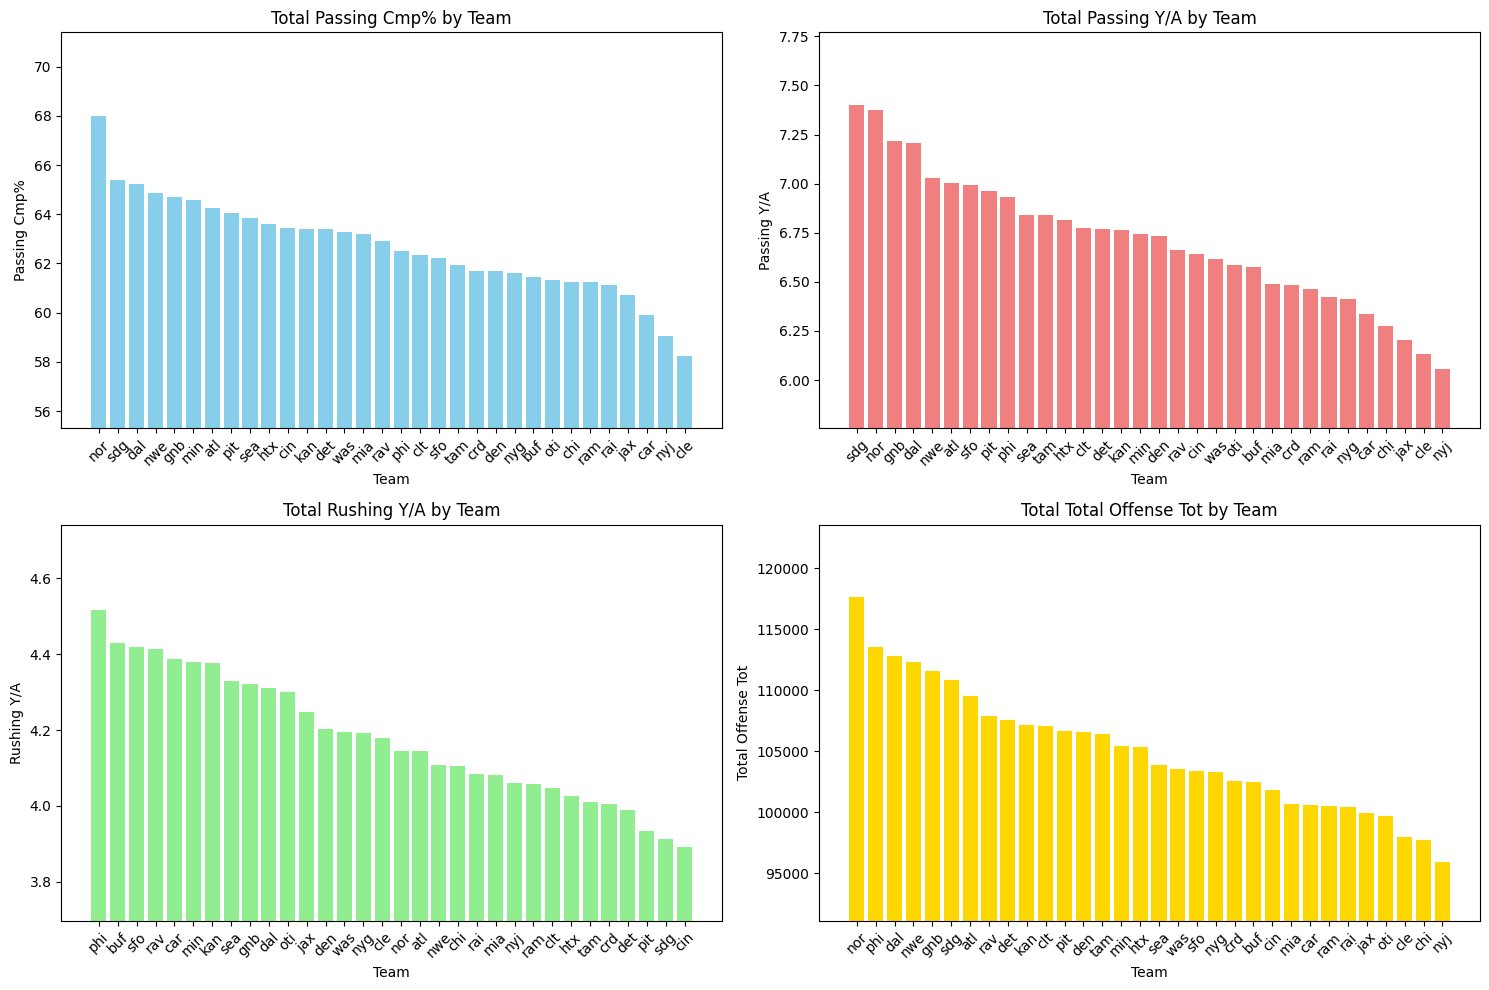

In [ ]:
stats_to_plot = ['Passing Cmp%','Passing Y/A','Rushing Y/A','Total Offense Tot']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()
for i, stat in enumerate(stats_to_plot):
    df_sorted = congregated_stats.sort_values(by=stat, ascending=False)
    ax = axes[i]
    ax.bar(df_sorted['Team'], df_sorted[stat], color=colors[i])
    ax.set_title(f'Total {stat} by Team', fontsize=12)
    ax.set_xlabel('Team', fontsize=10)
    ax.set_ylabel(stat, fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ymin = df_sorted[stat].min() * 0.95  
    ymax = df_sorted[stat].max() * 1.05  
    ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()

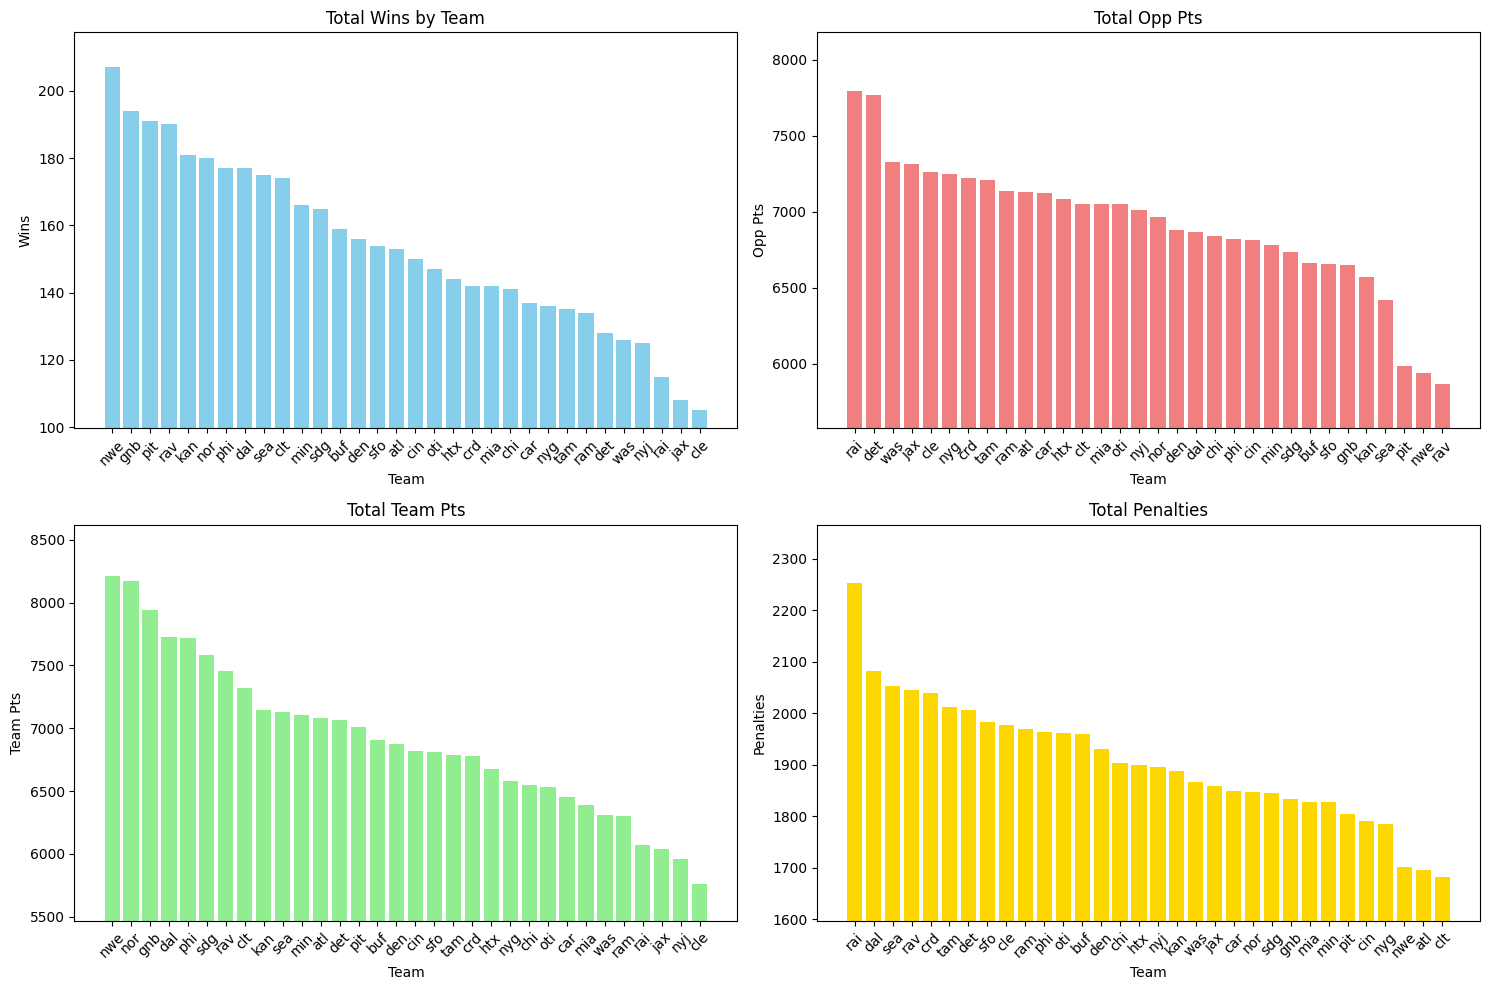

In [ ]:
stats_to_plot = ['Wins','Opp Pts', 'Team Pts','Penalties']
congregated_stats = congregated_stats.rename(columns={'Penalties Pen': 'Penalties'})
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()
for i, stat in enumerate(stats_to_plot):
    df_sorted = congregated_stats.sort_values(by=stat, ascending=False)
    ax = axes[i]
    ax.bar(df_sorted['Team'], df_sorted[stat], color=colors[i])
    if stat == 'Wins':
        ax.set_title(f'Total {stat} by Team', fontsize=12)
    else:
        ax.set_title(f'Total {stat}', fontsize=12)

    ax.set_xlabel('Team', fontsize=10)
    ax.set_ylabel(stat, fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ymin = df_sorted[stat].min() * 0.95 
    ymax = df_sorted[stat].max() * 1.05  
    ax.set_ylim(ymin, ymax)

plt.tight_layout()

plt.show()

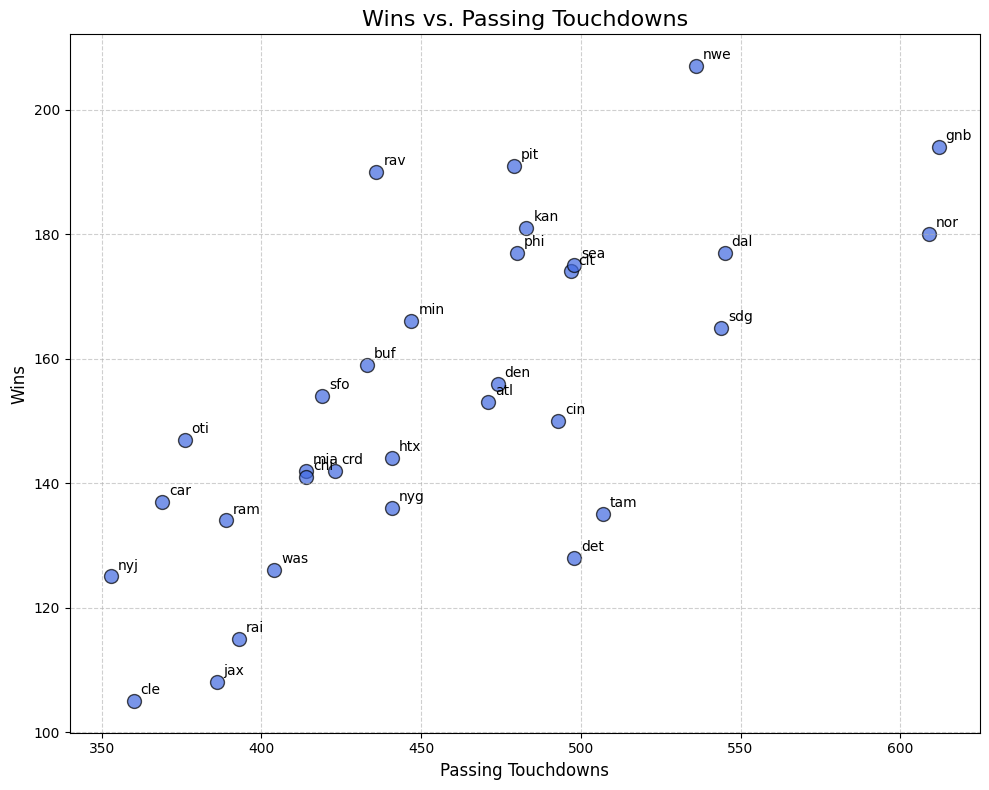

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(congregated_stats['Passing TD'], congregated_stats['Wins'], s=100, color='royalblue', alpha=0.7, edgecolors='black')

for i, team in enumerate(congregated_stats['Team']):
    ax.annotate(team, (congregated_stats['Passing TD'].iloc[i], congregated_stats['Wins'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points')

ax.set_title('Wins vs. Passing Touchdowns', fontsize=16)
ax.set_xlabel('Passing Touchdowns', fontsize=12)
ax.set_ylabel('Wins', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

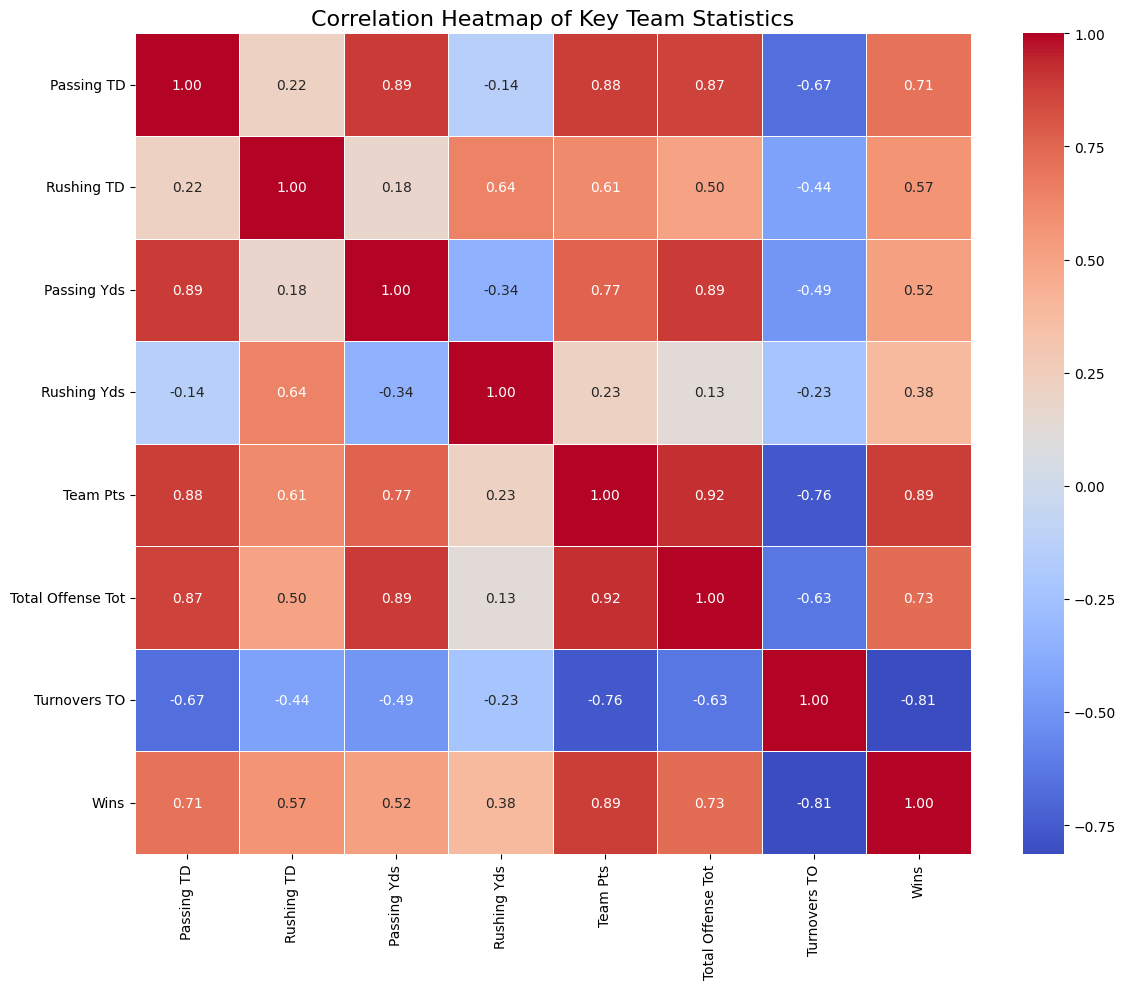

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Passing TD', 'Rushing TD', 'Passing Yds', 'Rushing Yds', 
                'Team Pts', 'Total Offense Tot', 'Turnovers TO', 'Wins']

correlation_matrix = congregated_stats[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Team Statistics', fontsize=16)

plt.tight_layout()
plt.show()

In [106]:
all_teams_df = pd.DataFrame()
for team_name, df in teams1.items():
    df['Team'] = team_name
    all_teams_df = pd.concat([all_teams_df, df])

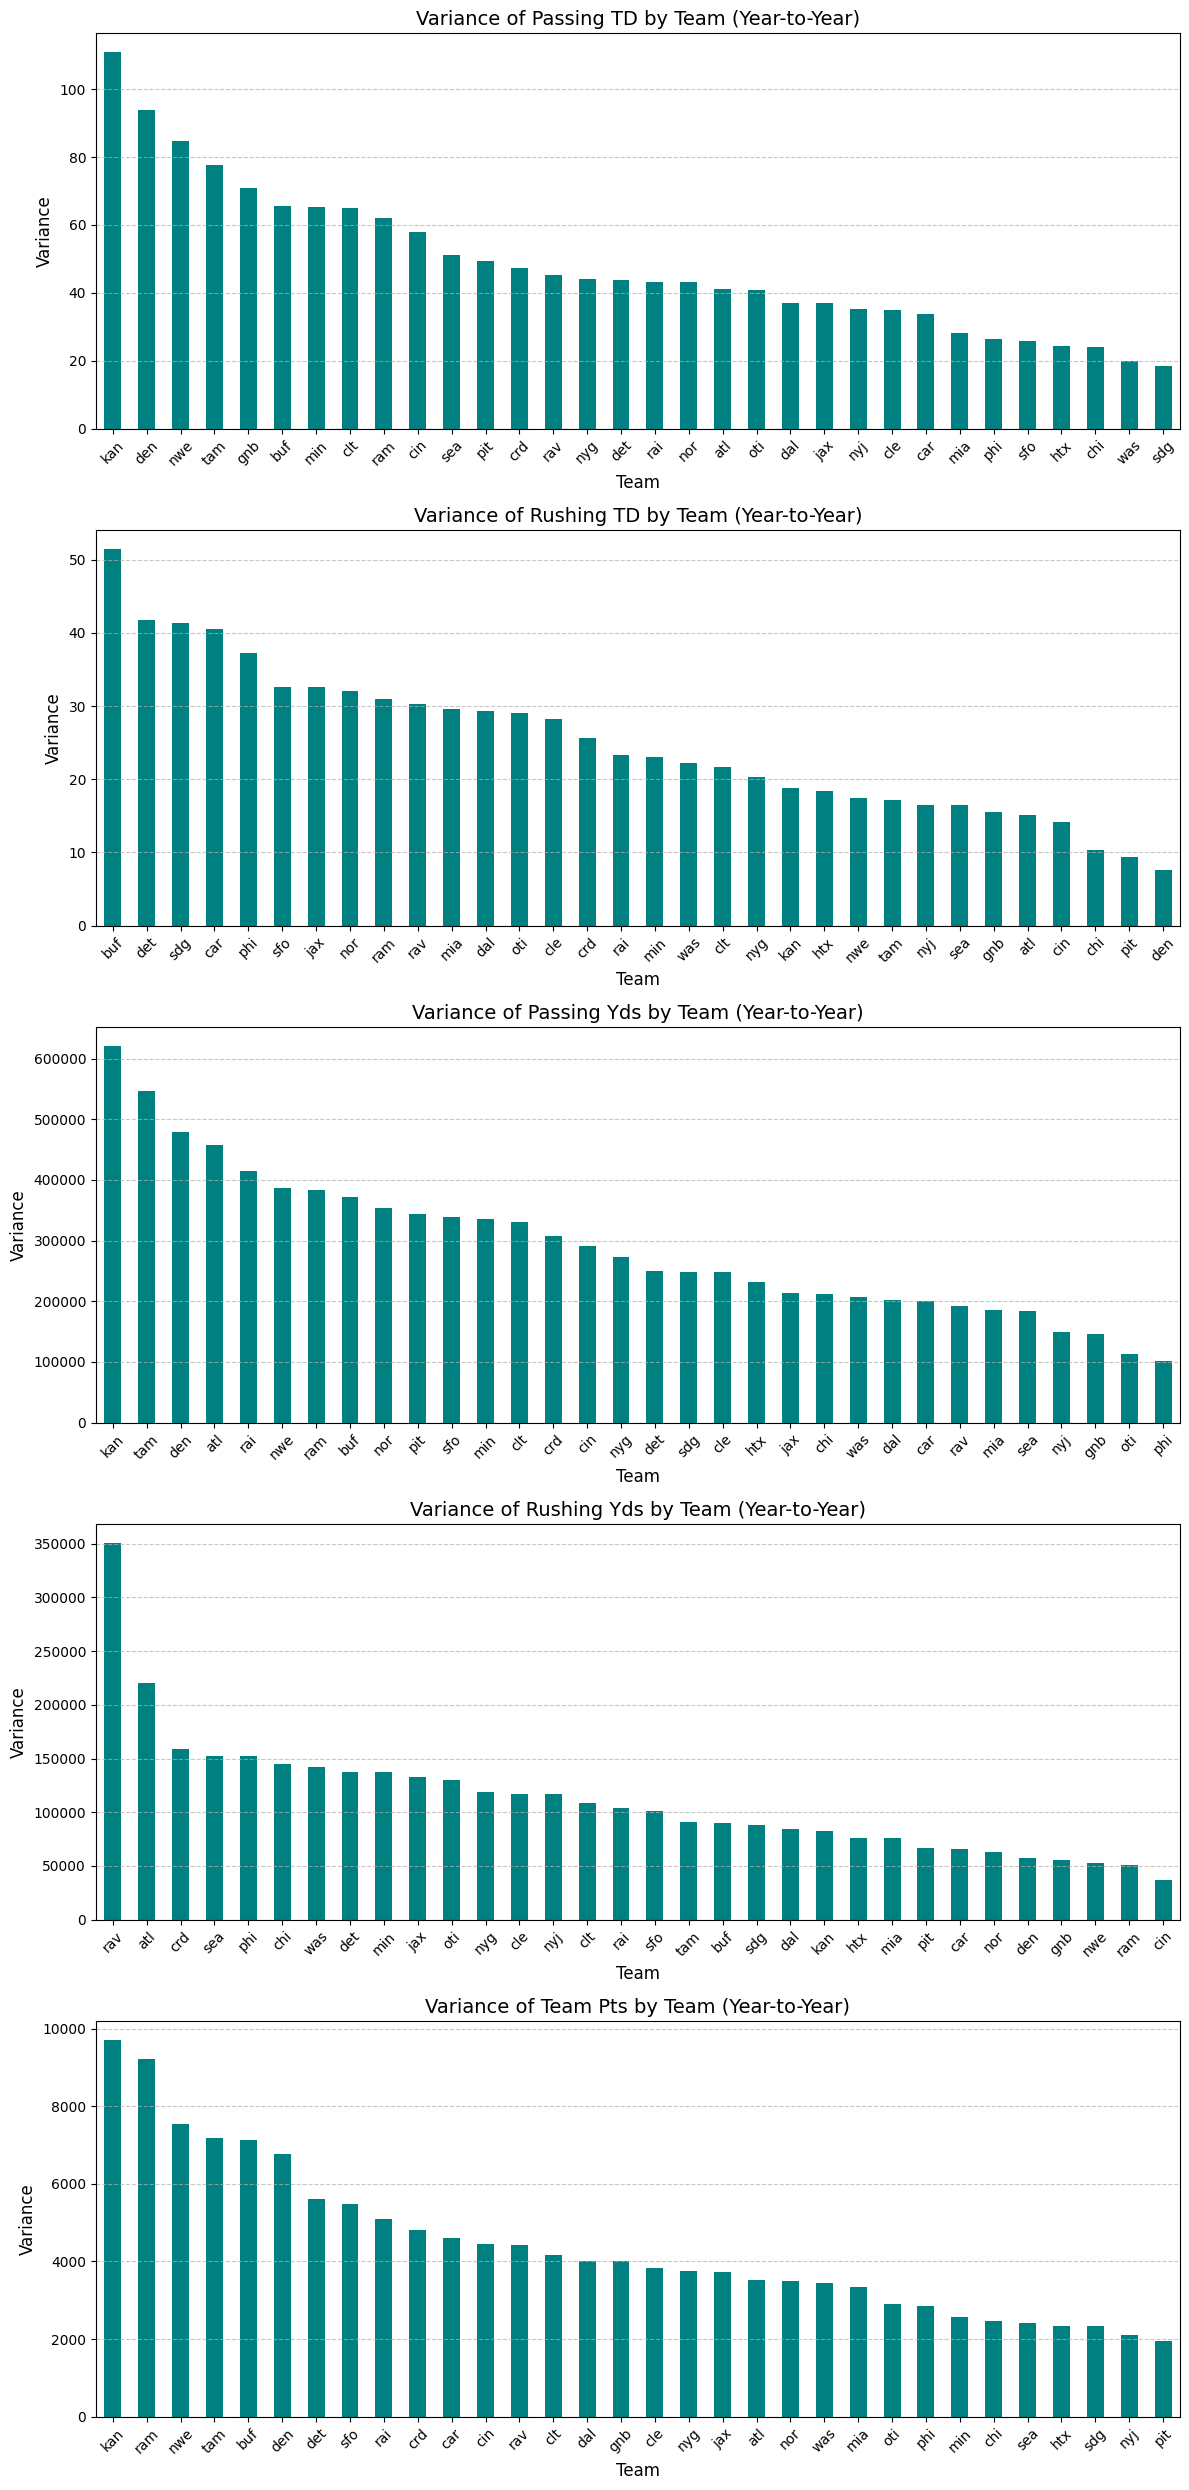

In [107]:
stats_to_analyze = ['Passing TD', 'Rushing TD', 'Passing Yds', 'Rushing Yds', 'Team Pts']
num_stats = len(stats_to_analyze)
fig, axes = plt.subplots(nrows=num_stats, ncols=1, figsize=(12, 5 * num_stats))

for i, stat in enumerate(stats_to_analyze):
    variance_by_team = all_teams_df.groupby('Team')[stat].var().sort_values(ascending=False)
    ax = axes[i]
    variance_by_team.plot(kind='bar', ax=ax, color='teal')
    ax.set_title(f'Variance of {stat} by Team (Year-to-Year)', fontsize=14)
    ax.set_ylabel('Variance', fontsize=12)
    ax.set_xlabel('Team', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

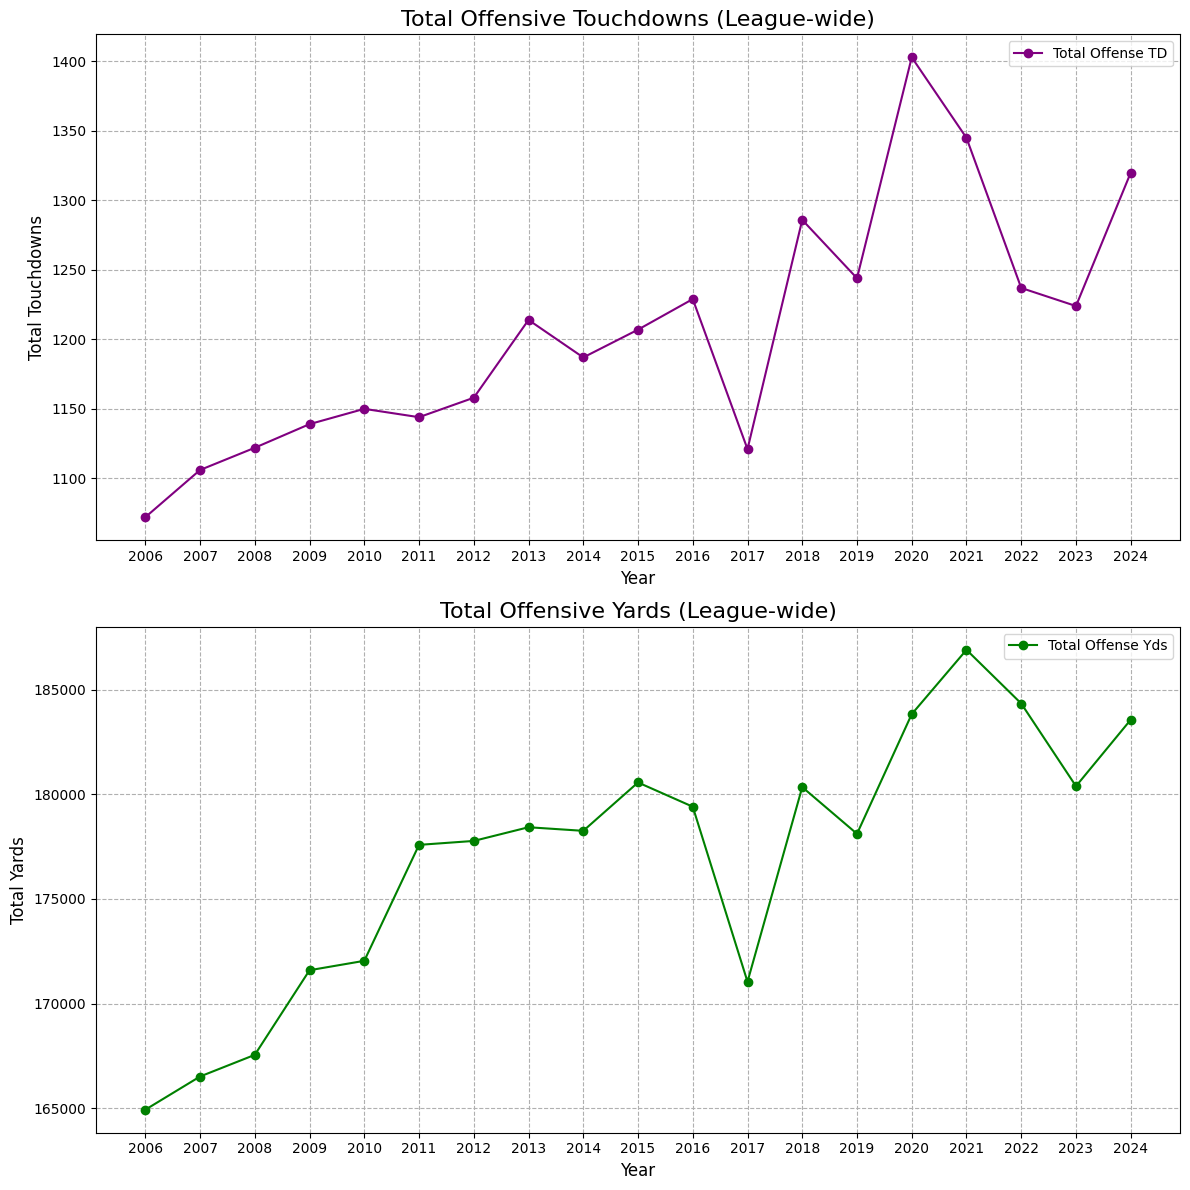

In [ ]:
yearly_totals = all_teams_df.groupby('Year').sum(numeric_only=True)
yearly_totals['Total Offense TD'] = yearly_totals['Passing TD'] + yearly_totals['Rushing TD']
yearly_totals['Total Offense Yds'] = yearly_totals['Passing Yds'] + yearly_totals['Rushing Yds']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

yearly_totals[['Total Offense TD']].plot(kind='line', ax=ax1, marker='o', color='purple')
ax1.set_title('Total Offensive Touchdowns (League-wide)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Total Touchdowns', fontsize=12)
ax1.grid(True, linestyle='--')
ax1.set_xticks(yearly_totals.index)

yearly_totals[['Total Offense Yds']].plot(kind='line', ax=ax2, marker='o', color='green')
ax2.set_title('Total Offensive Yards (League-wide)', fontsize=16)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Total Yards', fontsize=12)
ax2.grid(True, linestyle='--')
ax2.set_xticks(yearly_totals.index)

plt.tight_layout()
plt.show()

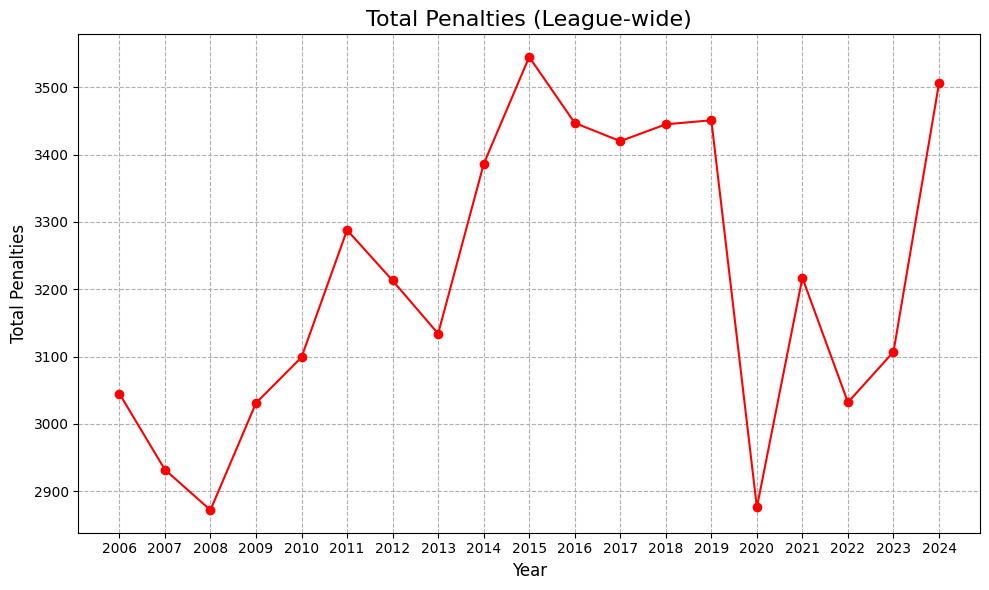

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))
yearly_totals['Penalties Pen'].plot(kind='line', marker='o', ax=ax, color='red')
ax.set_title('Total Penalties (League-wide)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Penalties', fontsize=12)
ax.grid(True, linestyle='--')
ax.set_xticks(yearly_totals.index)
plt.tight_layout()
plt.show()


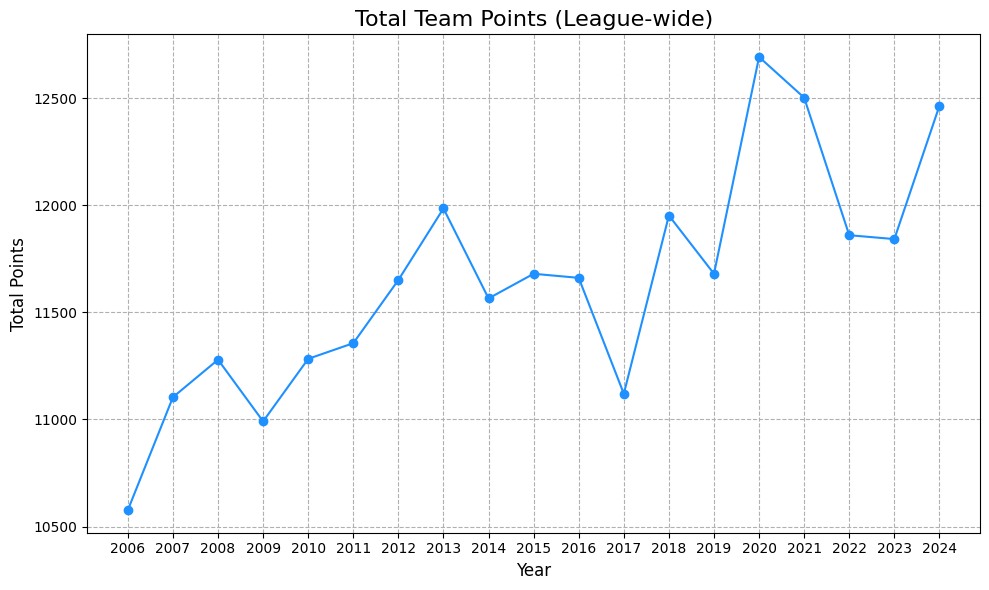

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))
yearly_totals['Team Pts'].plot(kind='line', marker='o', ax=ax, color='dodgerblue')
ax.set_title('Total Team Points (League-wide)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Points', fontsize=12)
ax.grid(True, linestyle='--')
ax.set_xticks(yearly_totals.index)
plt.tight_layout()
plt.show()